In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #绘图库
import seaborn as sns   #绘图库
import plotly.graph_objects as go  #绘图库
import matplotlib.cm as cm  #渐变色
from sklearn.model_selection import train_test_split   #训练集测试集划分
from sklearn.ensemble import RandomForestClassifier    #随机森林相关库
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score        #模型精度评分
from sklearn.metrics import confusion_matrix           #混淆矩阵表
from sklearn import svm  #支持向量机
from sklearn.neural_network import MLPClassifier  #BP神经网络
import xgboost as xgb    #xgboost
from sklearn import preprocessing  #xgboost编码器
from io import StringIO
from IPython.display import display   #用于展示多个styler



#### 数据处理 添加季节

In [4]:
# 加载 csv文件
data = pd.read_csv('PekingAirqulityDetails.csv')
data

,日期,AQI,质量等级,PM2.5,PM10,NO2,CO,SO2,O3_8h
0,2013/12/2,142,轻度污染,109,138,88,2.6,61,11
1,2013/12/3,86,良,64,86,54,1.6,38,45
2,2013/12/4,109,轻度污染,82,101,62,2.0,42,23
3,2013/12/5,56,良,39,56,38,1.2,30,52
4,2013/12/6,169,中度污染,128,162,78,2.5,48,15
...,...,...,...,...,...,...,...,...,...
3676,2023/12/26,55,良,26,46,44,0.7,3,0
3677,2023/12/27,64,良,45,71,51,0.8,3,34
3678,2023/12/28,129,轻度污染,98,132,69,1.2,3,21
3679,2023/12/29,150,轻度污染,115,145,62,1.2,3,45


In [5]:
# 添加一列作为季节
data['日期'] = pd.to_datetime(data['日期'])

# 根据日期的月份来创建季节的映射
seasons_mapping = {1: '冬', 2: '冬', 3: '春', 4: '春', 5: '春', 6: '夏',
                  7: '夏', 8: '夏', 9: '秋', 10: '秋', 11: '秋', 12: '冬'}

# 使用map函数将月份列转换为季节
data['季节'] = data['日期'].dt.month.map(seasons_mapping)
data
# 创建一个列名列表，包含你希望出现的所有列，并按照你想要的顺序进行排序
columns_ordered = ['日期','季节','AQI','质量等级','PM2.5','PM10','NO2','CO','SO2','O3_8h']
# 重新排序DataFrame的列
data = data[columns_ordered]
data.to_csv('SeasonAdded.csv',encoding='gbk',index=False)
data

,日期,季节,AQI,质量等级,PM2.5,PM10,NO2,CO,SO2,O3_8h
0,2013-12-02,冬,142,轻度污染,109,138,88,2.6,61,11
1,2013-12-03,冬,86,良,64,86,54,1.6,38,45
2,2013-12-04,冬,109,轻度污染,82,101,62,2.0,42,23
3,2013-12-05,冬,56,良,39,56,38,1.2,30,52
4,2013-12-06,冬,169,中度污染,128,162,78,2.5,48,15
...,...,...,...,...,...,...,...,...,...,...
3676,2023-12-26,冬,55,良,26,46,44,0.7,3,0
3677,2023-12-27,冬,64,良,45,71,51,0.8,3,34
3678,2023-12-28,冬,129,轻度污染,98,132,69,1.2,3,21
3679,2023-12-29,冬,150,轻度污染,115,145,62,1.2,3,45


#### 相关性分析

AQI的Pearson相关性分析: 
AQI      1.000000
PM2.5    0.863576
PM10     0.800854
CO       0.706213
NO2      0.612835
SO2      0.451434
O3_8h    0.230818
Name: AQI, dtype: float64


AQI的Spearman相关性分析: 
AQI      1.000000
PM2.5    0.806210
PM10     0.762350
CO       0.674557
NO2      0.532252
SO2      0.401957
O3_8h    0.310576
Name: AQI, dtype: float64




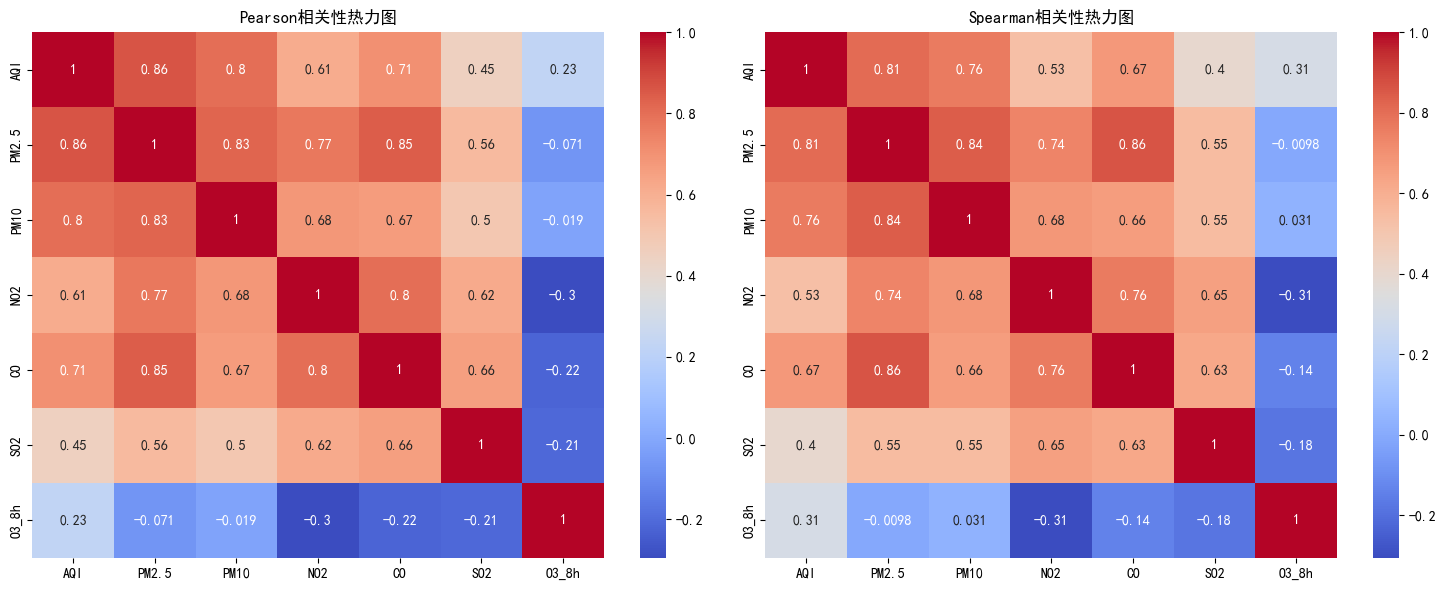

In [6]:
# 相关性分析
# 想要知道哪个属性和 'AQI' 的相关性最大

# 去除非数值的列
numeric_data = data.drop(['日期', '季节', '质量等级'], axis=1)

# define pearson方法
pearson_corr = numeric_data.corr(method='pearson')

# define spearman方法
spearman_corr = numeric_data.corr(method='spearman')

# 使用pearson相关系数
pearson_corr_AQI = pearson_corr['AQI'].sort_values(ascending=False)

# 使用spearman相关系数
spearman_corr_AQI = spearman_corr['AQI'].sort_values(ascending=False)

# 输出Pearson相关性分析表
print("AQI的Pearson相关性分析: ")
print(pearson_corr_AQI)
print("\n")

# 输出Spearman相关性分析表
print("AQI的Spearman相关性分析: ")
print(spearman_corr_AQI)
print("\n")

# 创建一个新的图形
plt.figure(figsize=(15, 6))

#字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 创建Pearson相关性分析的热力图
plt.subplot(1,2,1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Pearson相关性热力图")

# 创建Spearman相关性分析的热力图
plt.subplot(1,2,2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman相关性热力图")

# 显示图形
plt.tight_layout()
plt.show()

#### 数据可视化

In [7]:
selected_qualities = ['优', '重度污染']   #选中质量等级
selected_columns = ['质量等级', '季节']
df_temp = data[data['质量等级'].isin(selected_qualities)][selected_columns].copy()  # 这里我们使用.copy()来创建一个新的DataFrame

# 创建季节和质量等级的交叉表，这将作为我们流的宽度。
value = pd.crosstab(df_temp['季节'], df_temp['质量等级']).stack().reset_index().rename(columns={0:'value'})

# 创建源和目标的列表。使用df_temp，原始的data保持不变。
source = value['季节'].apply(lambda x: df_temp['季节'].unique().tolist().index(x))
target = value['质量等级'].apply(lambda x: df_temp['质量等级'].unique().tolist().index(x) + len(df_temp['季节'].unique()))

# 创建标签，同样使用df_temp。
label = df_temp['季节'].unique().tolist() + df_temp['质量等级'].unique().tolist()

# 创建桑基图的数据
data_draw = go.Sankey(node = dict(label = label, pad = 15, thickness = 20, line = dict(color = "black", width = 0.5)),
                 link = dict(source = source, target = target, value = value['value']))

# 创建图形
fig = go.Figure(data_draw)

# 显示图形
fig.show()



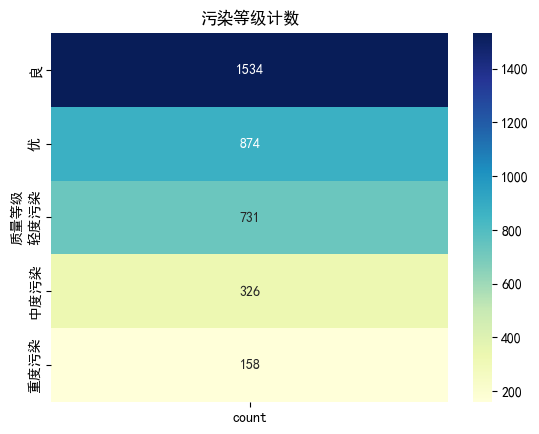

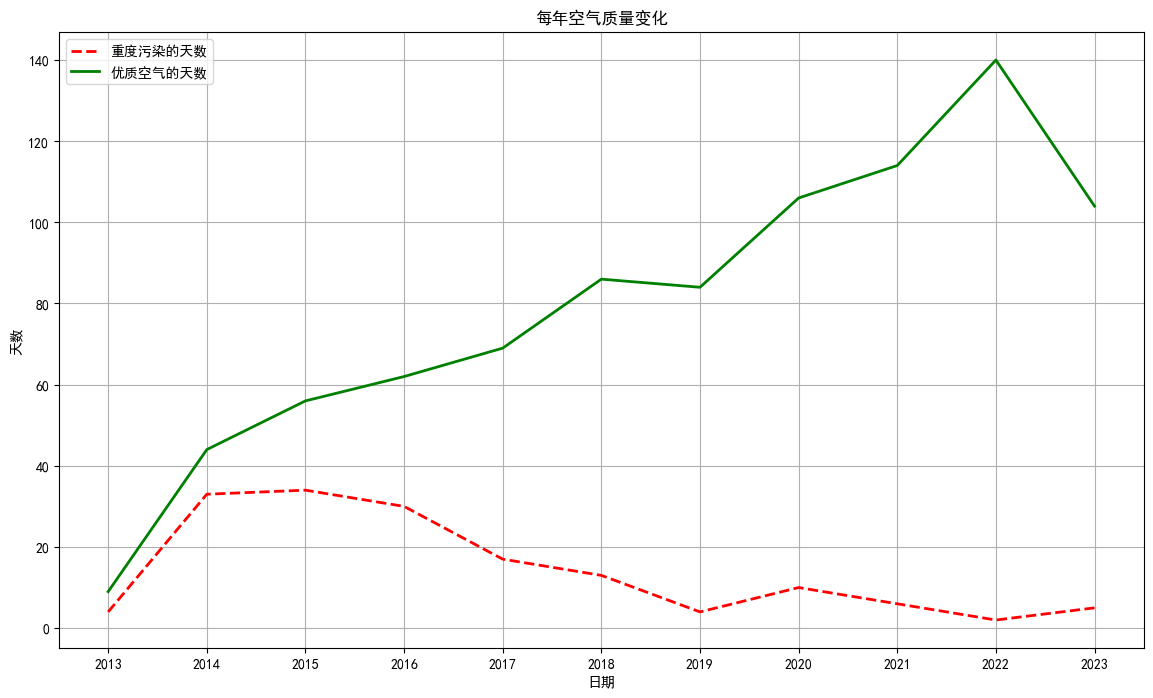

质量等级的所有种类：
['轻度污染' '良' '中度污染' '重度污染' '优' '严重污染' '无']


In [8]:
# 污染等级计数绘图
pollution_counts = data['质量等级'].value_counts()
# 只保留你想要的等级的计数
pollution_counts = pollution_counts[pollution_counts.index.isin(['中度污染', '重度污染', '轻度污染', '良', '优'])]
# 创建热度图
sns.heatmap(pollution_counts.to_frame(), annot=True, fmt='d', cmap='YlGnBu')
plt.title("污染等级计数")
plt.show()


# 分别筛选出质量等级为'重度污染'和'优'的数据
severe_pollution_data = data[data['质量等级']=='重度污染']
excellent_quality_data = data[data['质量等级']=='优']

# 计算每年重度污染和优质空气的天数
severe_days_per_year = severe_pollution_data.groupby(severe_pollution_data['日期'].dt.to_period("Y")).size()
excellent_days_per_year = excellent_quality_data.groupby(excellent_quality_data['日期'].dt.to_period("Y")).size()

plt.figure(figsize=(14,8))

# 绘制两个折线图，分别对应重度污染和优质空气的天数
plt.plot(severe_days_per_year.index.astype(str), severe_days_per_year.values, color='red', linestyle='dashed', linewidth=2, label='重度污染的天数')
plt.plot(excellent_days_per_year.index.astype(str), excellent_days_per_year.values, color='green', linestyle='solid', linewidth=2, label='优质空气的天数')

plt.xlabel('日期')
plt.ylabel('天数')
plt.title('每年空气质量变化')
plt.grid(True)

# 添加图例来标明每条线条代表的含义
plt.legend()

plt.show()


unique_grades = data['质量等级'].unique()
print("质量等级的所有种类：")
print(unique_grades)


#### 下面是使用随机森林算法对质量等级进行分类预测

In [15]:
# 将data的值复制到df当中
df = data


# 缺失值处理
# 使用列的中位数来填充NaN
# median = df['质量等级'].median()
# df['质量等级'].fillna(median, inplace=True)


# 执行独热编码转换类别字段
df = pd.get_dummies(df, columns=['季节'])
df = pd.get_dummies(df, columns=['日期'])

# 在我们进行预测前，我们需要将数据集划分为训练集和验证集
X = df.drop(columns='质量等级')
y = df['质量等级']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 使用随机森林分类器进行训练
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# 进行预测并检查准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("预测的准确率是：", accuracy)
# 概率
predicted_proba = classifier.predict_proba(X_test)

# 计算混淆矩阵并创建热力图
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('混淆矩阵热力图')
plt.xlabel('预测值')
plt.ylabel('真实值')



# 训练集上的预测
train_predictions = classifier.predict(X_train)
# 计算准确率、召回率、精确率 和 F1分数
accuracy_train = classifier.score(X_train, y_train)
recall_train = recall_score(y_train, train_predictions, average='weighted')
precision_train = precision_score(y_train, train_predictions, average='weighted',zero_division=1)
f1_train = f1_score(y_train, train_predictions, average='weighted')
accuracy_test = accuracy
recall_test = recall_score(y_test, predictions, average='weighted')
precision_test = precision_score(y_test, predictions, average='weighted',zero_division=1)
f1_test = f1_score(y_test, predictions, average='weighted')
# 创建 DataFrame
performance = pd.DataFrame({
    '准确率': [accuracy_train, accuracy_test],
    '召回率': [recall_train, recall_test],
    '精确率': [precision_train, precision_test],
    'F1': [f1_train, f1_test]
}, index = ['训练集', '测试集'])
# 显示 performance
performance_styler = performance.style.set_properties(**{'text-align': 'center'})
display(performance_styler)
# 构建预测结果对照表
results = pd.DataFrame({
    '真实值': y_test,
    '预测值': predictions
})

# 获得类别列表，按照模型内部的顺序
class_list = classifier.classes_

# 将预测的概率与其对应的类别关联起来
for i, quality_level in enumerate(class_list):
    results[f'{quality_level}预测概率'] = predicted_proba[:, i]

# 使用 .head() 方法获取前100条数据
results_head = results.head(100)

# 设置数据显示为居中格式
results_styler = results_head.style.set_properties(**{'text-align': 'center'})

# 显示居中对齐的前100条数据
display(results_styler)



KeyError: "['质量等级'] not found in axis"

#### 支持向量机方法进行分类预测

预测准确率： 0.9416553595658074
预测的准确率是： 0.9416553595658074


,准确率,召回率,精确率,F1
训练集,0.950068,0.950068,0.950171,0.949168
测试集,0.941655,0.941655,0.941870,0.940870


,真实值,预测值,严重污染预测概率,中度污染预测概率,优预测概率,无预测概率,良预测概率,轻度污染预测概率,重度污染预测概率
1097,严重污染,重度污染,0.475696,0.006748,0.002741,0.004222,0.004047,0.002994,0.503552
2784,优,优,0.000286,0.000335,0.997907,0.000729,0.000183,0.000258,0.000303
2440,良,良,0.000461,0.003527,0.002589,0.000429,0.712671,0.279447,0.000875
1694,优,优,0.000313,0.000327,0.995836,0.002579,0.000529,0.000111,0.000304
2494,良,良,0.000104,0.000022,0.004629,0.000236,0.994844,0.000089,0.000076
2270,轻度污染,轻度污染,0.000313,0.016276,0.000302,0.000100,0.001678,0.979670,0.001662
3477,良,良,0.000297,0.000386,0.105882,0.001106,0.890358,0.001710,0.000262
937,良,轻度污染,0.000263,0.001756,0.002405,0.000467,0.329485,0.665209,0.000416
495,中度污染,中度污染,0.001223,0.922588,0.000676,0.000568,0.001665,0.009827,0.063453
798,重度污染,重度污染,0.001464,0.001257,0.001210,0.001517,0.001402,0.000432,0.992719


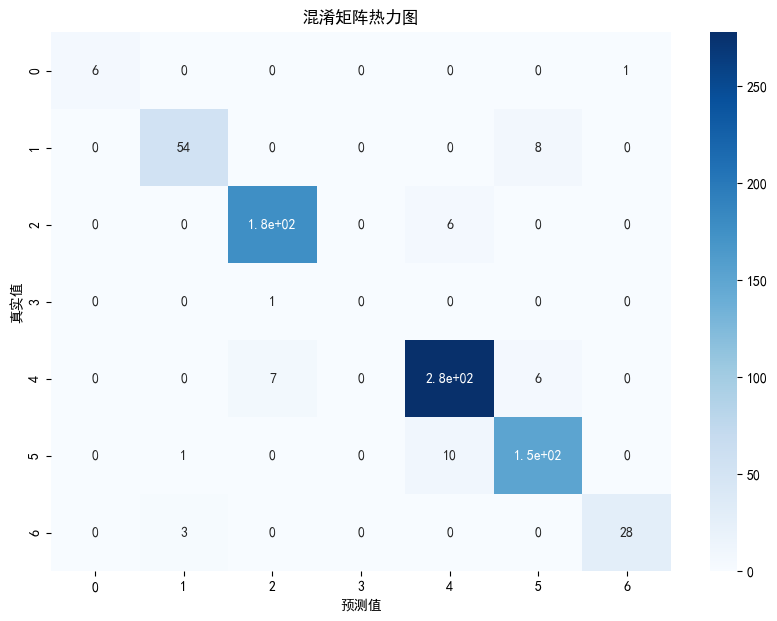

In [10]:

# 使用支持向量机分类器进行训练
classifier = svm.SVC(probability=True)
classifier.fit(X_train, y_train)

# 执行预测并计算准确度
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("预测准确率：", accuracy)

# 概率
predicted_proba = classifier.predict_proba(X_test)

# 进行预测并检查准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("预测的准确率是：", accuracy)
# 概率
predicted_proba = classifier.predict_proba(X_test)

# 计算混淆矩阵并创建热力图
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('混淆矩阵热力图')
plt.xlabel('预测值')
plt.ylabel('真实值')



# 训练集上的预测
train_predictions = classifier.predict(X_train)
# 计算准确率、召回率、精确率 和 F1分数
accuracy_train = classifier.score(X_train, y_train)
recall_train = recall_score(y_train, train_predictions, average='weighted')
precision_train = precision_score(y_train, train_predictions, average='weighted',zero_division=1)
f1_train = f1_score(y_train, train_predictions, average='weighted')
accuracy_test = accuracy
recall_test = recall_score(y_test, predictions, average='weighted')
precision_test = precision_score(y_test, predictions, average='weighted',zero_division=1)
f1_test = f1_score(y_test, predictions, average='weighted')
# 创建 DataFrame
performance = pd.DataFrame({
    '准确率': [accuracy_train, accuracy_test],
    '召回率': [recall_train, recall_test],
    '精确率': [precision_train, precision_test],
    'F1': [f1_train, f1_test]
}, index = ['训练集', '测试集'])
# 显示 performance
performance_styler = performance.style.set_properties(**{'text-align': 'center'})
display(performance_styler)
# 构建预测结果对照表
results = pd.DataFrame({
    '真实值': y_test,
    '预测值': predictions
})

# 获得类别列表，按照模型内部的顺序
class_list = classifier.classes_

# 将预测的概率与其对应的类别关联起来
for i, quality_level in enumerate(class_list):
    results[f'{quality_level}预测概率'] = predicted_proba[:, i]

# 使用 .head() 方法获取前100条数据
results_head = results.head(100)

# 设置数据显示为居中格式
results_styler = results_head.style.set_properties(**{'text-align': 'center'})

# 显示居中对齐的前100条数据
display(results_styler)



### bp神经网络进行分类预测

预测准确率： 0.8656716417910447
预测的准确率是： 0.8656716417910447


,准确率,召回率,精确率,F1
训练集,1.000000,1.000000,1.000000,1.000000
测试集,0.865672,0.865672,0.862486,0.863300


,真实值,预测值,严重污染预测概率,中度污染预测概率,优预测概率,无预测概率,良预测概率,轻度污染预测概率,重度污染预测概率
1097,严重污染,重度污染,0.390761,0.004143,0.000000,0.000000,0.000000,0.000158,0.604939
2784,优,优,0.000000,0.000002,0.905762,0.000078,0.094065,0.000093,0.000000
2440,良,良,0.000000,0.019700,0.000020,0.000000,0.512031,0.466273,0.001976
1694,优,优,0.000000,0.000000,0.986100,0.000070,0.013826,0.000004,0.000000
2494,良,良,0.000007,0.000223,0.013623,0.000001,0.973465,0.012658,0.000024
2270,轻度污染,中度污染,0.026346,0.415650,0.000000,0.000000,0.001119,0.211658,0.345227
3477,良,良,0.000000,0.000086,0.084173,0.000014,0.907334,0.008386,0.000008
937,良,良,0.000000,0.004059,0.000011,0.000000,0.766730,0.228939,0.000261
495,中度污染,重度污染,0.006165,0.133729,0.000000,0.000000,0.000002,0.009600,0.850504
798,重度污染,严重污染,0.496910,0.037231,0.000000,0.000000,0.000000,0.000004,0.465855


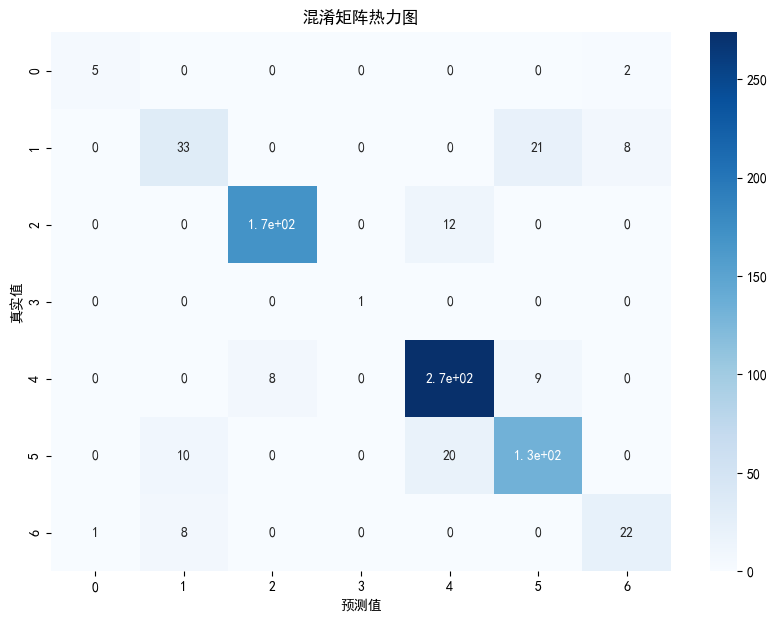

In [11]:
# 使用MLP神经网络（这里的MLP即为BP神经网络）进行训练
classifier = MLPClassifier(random_state=42, max_iter=300)

classifier.fit(X_train, y_train)

# 执行预测并计算准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("预测准确率：", accuracy)

# 概率
predicted_proba = classifier.predict_proba(X_test)

# 进行预测并检查准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("预测的准确率是：", accuracy)
# 概率
predicted_proba = classifier.predict_proba(X_test)

# 计算混淆矩阵并创建热力图
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('混淆矩阵热力图')
plt.xlabel('预测值')
plt.ylabel('真实值')



# 训练集上的预测
train_predictions = classifier.predict(X_train)
# 计算准确率、召回率、精确率 和 F1分数
accuracy_train = classifier.score(X_train, y_train)
recall_train = recall_score(y_train, train_predictions, average='weighted')
precision_train = precision_score(y_train, train_predictions, average='weighted',zero_division=1)
f1_train = f1_score(y_train, train_predictions, average='weighted')
accuracy_test = accuracy
recall_test = recall_score(y_test, predictions, average='weighted')
precision_test = precision_score(y_test, predictions, average='weighted',zero_division=1)
f1_test = f1_score(y_test, predictions, average='weighted')
# 创建 DataFrame
performance = pd.DataFrame({
    '准确率': [accuracy_train, accuracy_test],
    '召回率': [recall_train, recall_test],
    '精确率': [precision_train, precision_test],
    'F1': [f1_train, f1_test]
}, index = ['训练集', '测试集'])
# 显示 performance
performance_styler = performance.style.set_properties(**{'text-align': 'center'})
display(performance_styler)
# 构建预测结果对照表
results = pd.DataFrame({
    '真实值': y_test,
    '预测值': predictions
})

# 获得类别列表，按照模型内部的顺序
class_list = classifier.classes_

# 将预测的概率与其对应的类别关联起来
for i, quality_level in enumerate(class_list):
    results[f'{quality_level}预测概率'] = predicted_proba[:, i]

# 使用 .head() 方法获取前100条数据
results_head = results.head(100)

# 设置数据显示为居中格式
results_styler = results_head.style.set_properties(**{'text-align': 'center'})

# 显示居中对齐的前100条数据
display(results_styler)



#### 使用XGBOOST进行分类预测
注意质量等级这一列目前必须要encode成整型才能使用xgboost

预测准确率： 1.0
预测的准确率是： 1.0


,准确率,召回率,精确率,F1
训练集,1.000000,1.000000,1.000000,1.000000
测试集,1.000000,1.000000,1.000000,1.000000


,真实值,预测值,0预测概率,1预测概率,2预测概率,3预测概率,4预测概率,5预测概率,6预测概率
0,严重污染,严重污染,0.966149,0.001217,0.000549,0.000463,0.000828,0.001283,0.029511
1,优,优,0.000077,0.000067,0.999323,0.000088,0.000299,0.000123,0.000024
2,良,良,0.000129,0.000165,0.000237,0.000164,0.998850,0.000407,0.000048
3,优,优,0.000109,0.000096,0.998958,0.000201,0.000427,0.000175,0.000034
4,良,良,0.000053,0.000037,0.000078,0.000055,0.999677,0.000084,0.000016
5,轻度污染,轻度污染,0.000143,0.000309,0.000192,0.000150,0.000268,0.998850,0.000088
6,良,良,0.000035,0.000037,0.000127,0.000053,0.999658,0.000077,0.000013
7,良,良,0.000091,0.000130,0.000116,0.000115,0.999199,0.000304,0.000046
8,中度污染,中度污染,0.000072,0.998796,0.000112,0.000111,0.000256,0.000385,0.000268
9,重度污染,重度污染,0.000457,0.002104,0.000538,0.000536,0.000958,0.001484,0.993923


Text(97.72222222222221, 0.5, '真实值')

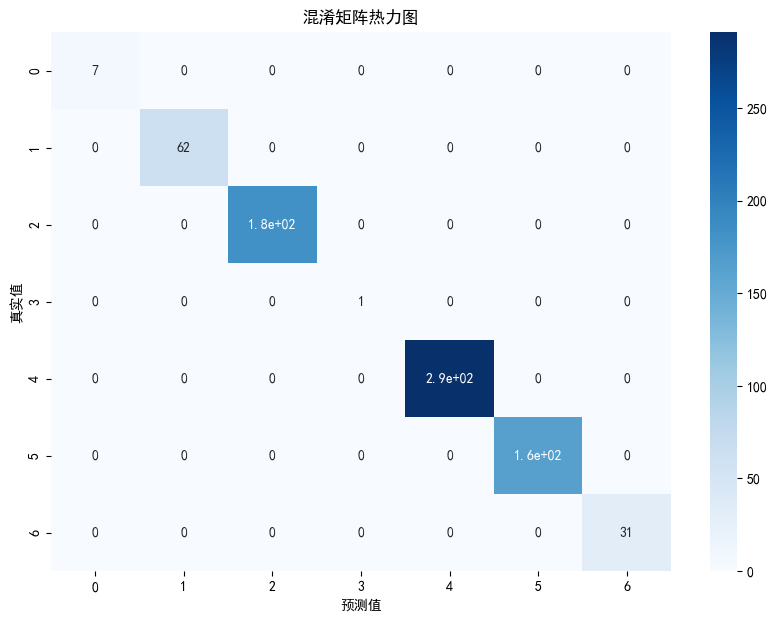

In [23]:

# 使用XGBoost进行训练
classifier = xgb.XGBClassifier(use_label_encoder=True,eval_metric='mlogloss', random_state=42)   #打开编码器才行



# 创建一个LabelEncoder对象
le = preprocessing.LabelEncoder()

# 使用LabelEncoder对象fit并转化y_train，ytest
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

# 然后你就可以使用y_train_encoded来训练你的模型了
classifier.fit(X_train, y_train_encoded)

# 执行预测并计算准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test_encoded, predictions)
print("预测准确率：", accuracy)

# 概率
predicted_proba = classifier.predict_proba(X_test)

# 进行预测并检查准确率
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test_encoded, predictions)
print("预测的准确率是：", accuracy)
# 概率
predicted_proba = classifier.predict_proba(X_test)



# 训练集上的预测
train_predictions = classifier.predict(X_train)
# 计算准确率、召回率、精确率 和 F1分数
accuracy_train = classifier.score(X_train, y_train_encoded)
recall_train = recall_score(y_train_encoded, train_predictions, average='weighted')
precision_train = precision_score(y_train_encoded, train_predictions, average='weighted',zero_division=1)
f1_train = f1_score(y_train_encoded, train_predictions, average='weighted')
accuracy_test = accuracy
recall_test = recall_score(y_test_encoded, predictions, average='weighted')
precision_test = precision_score(y_test_encoded, predictions, average='weighted',zero_division=1)
f1_test = f1_score(y_test_encoded, predictions, average='weighted')
# 创建 DataFrame
performance = pd.DataFrame({
    '准确率': [accuracy_train, accuracy_test],
    '召回率': [recall_train, recall_test],
    '精确率': [precision_train, precision_test],
    'F1': [f1_train, f1_test]
}, index = ['训练集', '测试集'])
# 显示 performance
performance_styler = performance.style.set_properties(**{'text-align': 'center'})
display(performance_styler)
# 构建预测结果对照表
results = pd.DataFrame({
    '真实值': y_test_encoded,
    '预测值': predictions
})

# 对预测结果进行解码
predictions_category = le.inverse_transform(predictions)

# 对y_test_encoded进行解码
y_test_category = le.inverse_transform(y_test_encoded)

# 然后创建一个新的results DataFrame
results_category = pd.DataFrame({
    '真实值': y_test_category,
    '预测值': predictions_category
})


# 获得类别列表，按照模型内部的顺序
class_list = classifier.classes_

# 将预测的概率与其对应的类别关联起来
for i, quality_level in enumerate(class_list):
    results_category[f'{quality_level}预测概率'] = predicted_proba[:, i]

# 使用 .head() 方法获取前100条数据
results_head = results_category.head(100)

# 设置数据显示为居中格式
results_styler = results_head.style.set_properties(**{'text-align': 'center'})

# 显示居中对齐的前100条数据
display(results_styler)



# 计算混淆矩阵并创建热力图
cm = confusion_matrix(y_test_category, predictions_category)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.title('混淆矩阵热力图')
plt.xlabel('预测值')
plt.ylabel('真实值')

